In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def translate(points, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])
    return apply_transformation(points, translation_matrix)


In [ ]:
def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                               [0, sy, 0],
                               [0, 0, 1]])
    return apply_transformation(points, scaling_matrix)


In [ ]:
def rotate(points, angle):
    rad = np.deg2rad(angle)
    rotation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                                [np.sin(rad),  np.cos(rad), 0],
                                [0, 0, 1]])
    return apply_transformation(points, rotation_matrix)


In [ ]:
def reflect(points, axis='x'):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0],
                                      [0, -1, 0],
                                      [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0],
                                      [0, 1, 0],
                                      [0, 0, 1]])
    return apply_transformation(points, reflection_matrix)


In [ ]:
def shear(points, shx=0, shy=0):
    shearing_matrix = np.array([[1, shx, 0],
                                [shy, 1, 0],
                                [0, 0, 1]])
    return apply_transformation(points, shearing_matrix)


In [ ]:
def apply_transformation(points, transformation_matrix):
    points_homogeneous = np.vstack((points, np.ones((1, points.shape[1]))))
    transformed_points = transformation_matrix @ points_homogeneous
    return transformed_points[:2]


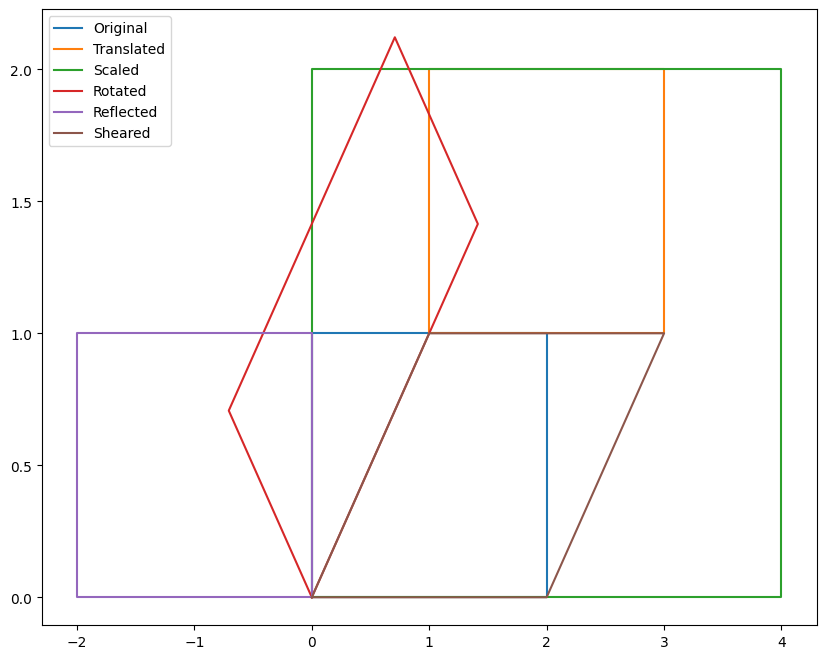

In [ ]:
rectangle = np.array([[0, 0, 2, 2, 0],
                      [0, 1, 1, 0, 0]])

translated_rectangle = translate(rectangle, 1, 1)
scaled_rectangle = scale(rectangle, 2, 2)
rotated_rectangle = rotate(rectangle, 45)
reflected_rectangle = reflect(rectangle, 'y')
sheared_rectangle = shear(rectangle, shx=1)

plt.figure(figsize=(10, 8))
plt.plot(rectangle[0], rectangle[1], label='Original')
plt.plot(translated_rectangle[0], translated_rectangle[1], label='Translated')
plt.plot(scaled_rectangle[0], scaled_rectangle[1], label='Scaled')
plt.plot(rotated_rectangle[0], rotated_rectangle[1], label='Rotated')
plt.plot(reflected_rectangle[0], reflected_rectangle[1], label='Reflected')
plt.plot(sheared_rectangle[0], sheared_rectangle[1], label='Sheared')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import cv2
image = cv2.imread('/content/Lena_Image.png',1)

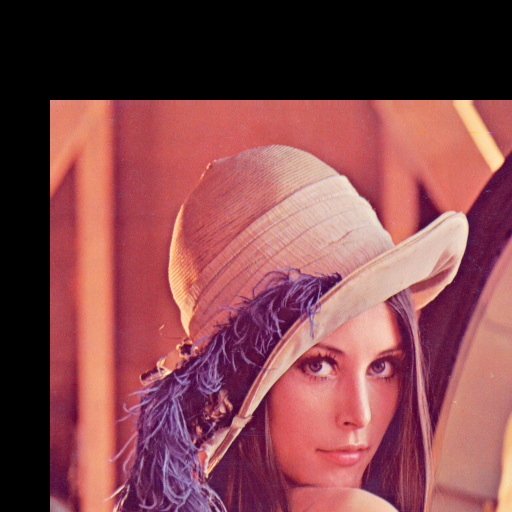

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, translation_matrix, (cols, rows))


translated_image = translate_image(image, 50, 100)
cv2_imshow( translated_image)


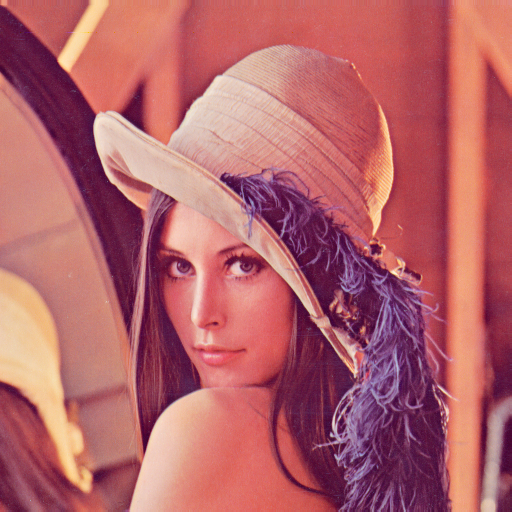

In [ ]:
def reflect_image(image, axis='x'):
    if axis == 'x':
        return cv2.flip(image, 0)
    elif axis == 'y':
        return cv2.flip(image, 1)

reflected_image = reflect_image(image, 'y')
cv2_imshow(reflected_image)


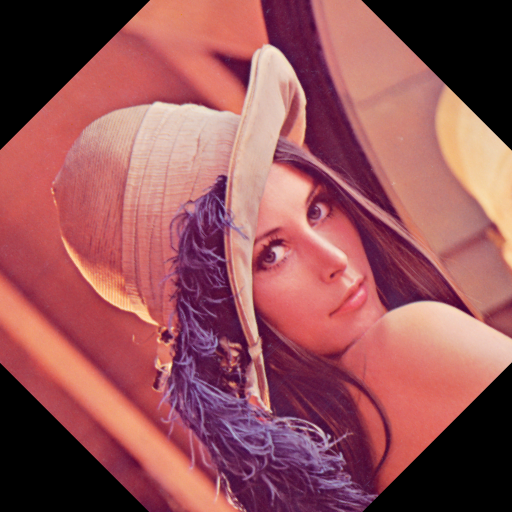

In [ ]:
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (cols, rows))

rotated_image = rotate_image(image, 45)
cv2_imshow( rotated_image)


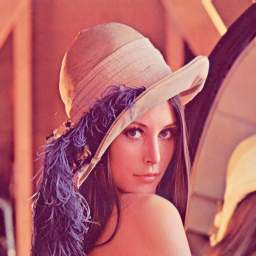

In [ ]:
def scale_image(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

scaled_image = scale_image(image, 0.5, 0.5)
cv2_imshow( scaled_image)


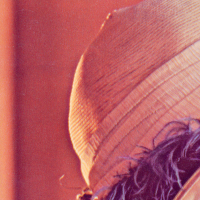

In [ ]:
def crop_image(image, x_start, y_start, width, height):
    return image[y_start:y_start+height, x_start:x_start+width]

cropped_image = crop_image(image, 50, 50, 200, 200)
cv2_imshow(cropped_image)


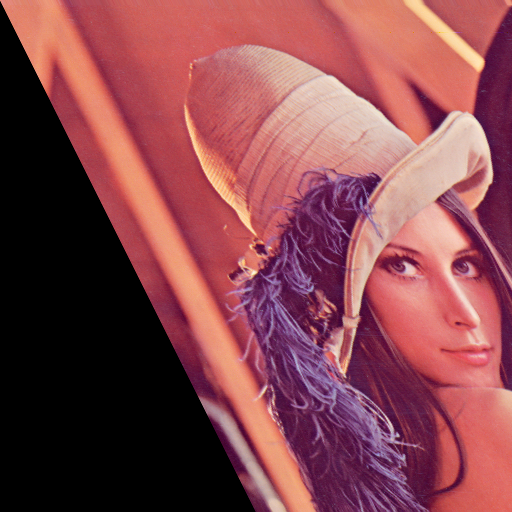

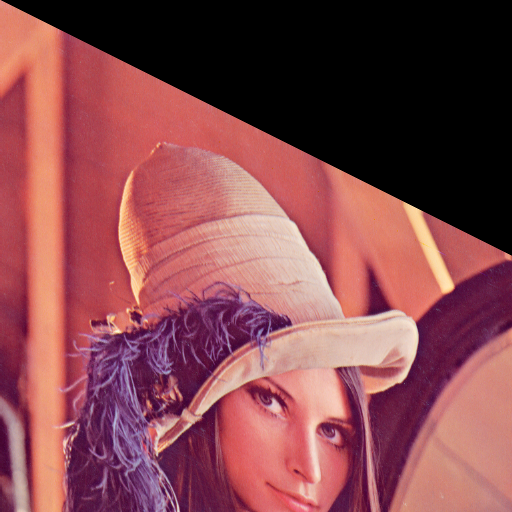

In [ ]:
def shear_image(image, shx=0, shy=0):
    rows, cols = image.shape[:2]
    shearing_matrix = np.float32([[1, shx, 0], [shy, 1, 0]])
    return cv2.warpAffine(image, shearing_matrix, (cols, rows))

sheared_image_x = shear_image(image, shx=0.5)
sheared_image_y = shear_image(image, shy=0.5)
cv2_imshow( sheared_image_x)
cv2_imshow( sheared_image_y)
